# Comparison of Potato Varieties Under Extreme Climate Year

## 1. Background

Climate variability associated with climate change, such as increased occurrences of dry and wet years, presents significant challenges to crop productivity and resilience. In the Netherlands, potato is a key agricultural crop, and its phenotypic development is highly sensitive to environmental conditions. Different potato varieties exhibit distinct patterns of biomass partitioning to organs such as leaves, stems, roots, and tubers, which vary across developmental stages. A modeling approach enables the simulation of phenotypic responses under varying climatic conditions, offering insights into how genotype-specific traits influence performance. By simulating potato growth under dry and wet years, this study aims to evaluate the phenotypic variability among varieties and assess the implications of climate variability on yield and organ development.

This study compares three commercially important potato varieties: Fontane (intermediate maturing), Innovator (early maturing), and Markies (late maturing). These varieties differ in maturity characteristics and biomass partitioning strategies. All are widely used ware potatoes for processing and consumption. Fontane and Markies are cultivated across Europe and globally, while Innovator, valued for its frying and baking qualities, is expanding from Europe into North America.

To evaluate their performance under climate variability, crop growth is simulated using identical planting dates and similar nitrogen fertilizer applications across extreme climate year: an extremely dry summer period in year 2018, and an extremely wet planting period in year 1998 ([van Oort et al., 2023](https://www.louisbolk.nl/sites/default/files/publication/pdf/recent-weather-extremes-and-their-impact-crop-yields-netherlands.pdf)). This experimental design allows comparison of varietal responses to water availability during critical growth stages.

To address the impact of climate variability on varietal performance, this study investigates the following research questions:
 - How do phenotypic responses to dry and wet years differ among potato varieties with distinct maturity and biomass partitioning traits?
 - What do these phenotypic differences imply for adaptation and breeding of climate-resilient potato varieties under future climate scenarios?



## 2. Methods

The WOFOST 7.2 crop simulation model was used to evaluate the growth dynamics of three potato varieties: Fontane, Innovator, and Markies, under contrasting climatic conditions represented by a dry year (2018) and a wet year (1998) in the Netherlands.


Simulations were conducted with identical planting dates and similar nitrogen inputs to isolate the effects of climate and varietal characteristics. Model outputs included key phenotypic traits such as leaf area index (LAI), organ-specific biomass (roots, stems, leaves, and storage organs), and developmental rates, allowing for a comparative analysis of varietal responses to water availability during critical growth stages.

### 2.1 Import libraries

In [117]:
%matplotlib inline
import sys
import datetime as dt
from pathlib import Path

import yaml
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.dates as mdates
import pandas as pd

import pcse
from pcse.models import Wofost72_PP
from pcse.input import YAMLCropDataProvider, NASAPowerWeatherDataProvider
from pcse.input.sitedataproviders import WOFOST81SiteDataProvider_Classic 
from pcse.base import ParameterProvider
print("This notebook was built with:")
print("python version: %s " % sys.version)
print("PCSE version: %s" %  pcse.__version__)

This notebook was built with:
python version: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)] 
PCSE version: 6.0.9


### 2.2 Retrieve weather data from weather data provider

In [118]:
wdp= NASAPowerWeatherDataProvider(longitude=5, latitude=52)
print(wdp)

Weather data provided by: NASAPowerWeatherDataProvider
--------Description---------
NASA/POWER Source Native Resolution Daily Data
----Site characteristics----
Elevation:    3.5
Latitude:  52.000
Longitude:  5.000
Data available for 1984-01-01 - 2025-06-18
Number of missing days: 2



### 2.3 Setting Agromanagement file



In [119]:
fpath = Path.cwd()
cropd = YAMLCropDataProvider(fpath=fpath)


In [120]:
# Dry year
year = 2018
fertiliser_doys = [1, 40, 80]
fertiliser = [dt.date(year,4,1) + dt.timedelta(days=(doy-1)) for doy in fertiliser_doys]

agro_dry_fontane = f"""
        - {year}-04-01:
            CropCalendar:
                crop_name: potato
                variety_name: Fontane
                crop_start_date: {year}-04-01
                crop_start_type: sowing
                crop_end_date: {year}-10-31
                crop_end_type: harvest
                max_duration: 1000
            TimedEvents:
            -   event_signal: apply_n
                name:  Timed N application table
                comment: All fertilizer amounts in kg/ha
                events_table:
                - {fertiliser[0]}: {{N_amount : 125, N_recovery: 0.7}}
                - {fertiliser[1]}: {{N_amount : 85, N_recovery: 0.7}}
                - {fertiliser[2]}: {{N_amount : 110, N_recovery: 0.7}}
            StateEvents: null
        - {year}-10-31:
        """

agro_fontane_dry = yaml.safe_load(agro_dry_fontane)

agro_dry_inno = f"""
        - {year}-04-01:
            CropCalendar:
                crop_name: potato
                variety_name: Innovator
                crop_start_date: {year}-04-01
                crop_start_type: sowing
                crop_end_date: {year}-10-31
                crop_end_type: harvest
                max_duration: 1000
            TimedEvents:
            -   event_signal: apply_n
                name:  Timed N application table
                comment: All fertilizer amounts in kg/ha
                events_table:
                - {fertiliser[0]}: {{N_amount : 125, N_recovery: 0.7}}
                - {fertiliser[1]}: {{N_amount : 85, N_recovery: 0.7}}
                - {fertiliser[2]}: {{N_amount : 110, N_recovery: 0.7}}
            StateEvents: null
        - {year}-10-31:
        """

agro_inno_dry = yaml.safe_load(agro_dry_inno)

agro_dry_mark = f"""
        - {year}-04-01:
            CropCalendar:
                crop_name: potato
                variety_name: Markies
                crop_start_date: {year}-04-01
                crop_start_type: sowing
                crop_end_date: {year}-10-31
                crop_end_type: harvest
                max_duration: 1000
            TimedEvents:
            -   event_signal: apply_n
                name:  Timed N application table
                comment: All fertilizer amounts in kg/ha
                events_table:
                - {fertiliser[0]}: {{N_amount : 125, N_recovery: 0.7}}
                - {fertiliser[1]}: {{N_amount : 85, N_recovery: 0.7}}
                - {fertiliser[2]}: {{N_amount : 110, N_recovery: 0.7}}
            StateEvents: null
        - {year}-10-31:
        """

agro_mark_dry = yaml.safe_load(agro_dry_mark)

In [121]:
# Wet year
year = 1998
fertiliser_doys = [1, 40, 80]
fertiliser = [dt.date(year,4,1) + dt.timedelta(days=(doy-1)) for doy in fertiliser_doys]

agro_wet_fontane = f"""
        - {year}-04-01:
            CropCalendar:
                crop_name: potato
                variety_name: Fontane
                crop_start_date: {year}-04-01
                crop_start_type: sowing
                crop_end_date: {year}-10-31
                crop_end_type: harvest
                max_duration: 1000
            TimedEvents:
            -   event_signal: apply_n
                name:  Timed N application table
                comment: All fertilizer amounts in kg/ha
                events_table:
                - {fertiliser[0]}: {{N_amount : 125, N_recovery: 0.7}}
                - {fertiliser[1]}: {{N_amount : 85, N_recovery: 0.7}}
                - {fertiliser[2]}: {{N_amount : 110, N_recovery: 0.7}}
            StateEvents: null
        - {year}-10-31:
        """

agro_fontane_wet = yaml.safe_load(agro_wet_fontane)

agro_wet_inno = f"""
        - {year}-04-01:
            CropCalendar:
                crop_name: potato
                variety_name: Innovator
                crop_start_date: {year}-04-01
                crop_start_type: sowing
                crop_end_date: {year}-10-31
                crop_end_type: harvest
                max_duration: 1000
            TimedEvents:
            -   event_signal: apply_n
                name:  Timed N application table
                comment: All fertilizer amounts in kg/ha
                events_table:
                - {fertiliser[0]}: {{N_amount : 125, N_recovery: 0.7}}
                - {fertiliser[1]}: {{N_amount : 85, N_recovery: 0.7}}
                - {fertiliser[2]}: {{N_amount : 110, N_recovery: 0.7}}
            StateEvents: null
        - {year}-10-31:
        """

agro_inno_wet = yaml.safe_load(agro_wet_inno)

agro_wet_mark = f"""
        - {year}-04-01:
            CropCalendar:
                crop_name: potato
                variety_name: Markies
                crop_start_date: {year}-04-01
                crop_start_type: sowing
                crop_end_date: {year}-10-31
                crop_end_type: harvest
                max_duration: 1000
            TimedEvents:
            -   event_signal: apply_n
                name:  Timed N application table
                comment: All fertilizer amounts in kg/ha
                events_table:
                - {fertiliser[0]}: {{N_amount : 125, N_recovery: 0.7}}
                - {fertiliser[1]}: {{N_amount : 85, N_recovery: 0.7}}
                - {fertiliser[2]}: {{N_amount : 110, N_recovery: 0.7}}
            StateEvents: null
        - {year}-10-31:
        """

agro_mark_wet = yaml.safe_load(agro_wet_mark)

### 2.4 Setting soil and site parameters

In [ ]:
soild = {
        # Soil data from soil type "EC3-medium-fine" as in CGMS-LINGRA doc (Bouman et al 1996).
         "SMFCF": 0.30,  #[cm3 cm-3] Soil moisture content at field capacity
         "SMW": 0.104,    #[cm3 cm-3] Soil moisture content at wilting point
         "SM0": 0.41,     #[cm3 cm-3] Soil porosity, saturated moisture content
         "CRAIRC": 0.06,  #[cm3 cm-3] Critical air content in the root zone
         "RDMSOL": 40,    #[cm] Maximum rooting depth of the soil 
         "KSUB":1.47,     #[cm day-1] Maximum percolation rate of water to subsoil
         "SOPE":1.47      #[cm day-1] Maximum percolation rate of water through the root zone
}

sited = WOFOST81SiteDataProvider_Classic(WAV=10, CO2=400, NAVAILI=40)
sited["TemperatureSoilinit"] = 5.0

#params for LINGRA-N
params = ParameterProvider(cropdata=cropd, soildata=soild, sitedata=sited)

## 3. Results

In [123]:
# Running the WOFOST model
# Dry year
# Fontane
wofost_fontane_dry = Wofost72_PP(params, wdp, agro_fontane_dry)
wofost_fontane_dry.run_till_terminate()
df_fontane_dry = pd.DataFrame(wofost_fontane_dry.get_output()).set_index("day")

# Innovator
wofost_inno_dry = Wofost72_PP(params, wdp, agro_inno_dry)
wofost_inno_dry.run_till_terminate()
df_inno_dry = pd.DataFrame(wofost_inno_dry.get_output()).set_index("day")

# Markies
wofost_mark_dry = Wofost72_PP(params, wdp, agro_mark_dry)
wofost_mark_dry.run_till_terminate()
df_mark_dry = pd.DataFrame(wofost_mark_dry.get_output()).set_index("day")

# Wet year
# Fontane
wofost_fontane_wet = Wofost72_PP(params, wdp, agro_fontane_wet)
wofost_fontane_wet.run_till_terminate()
df_fontane_wet = pd.DataFrame(wofost_fontane_dry.get_output()).set_index("day")

# Innovator
wofost_inno_wet = Wofost72_PP(params, wdp, agro_inno_wet)
wofost_inno_wet.run_till_terminate()
df_inno_wet = pd.DataFrame(wofost_inno_dry.get_output()).set_index("day")

# Markies
wofost_mark_wet = Wofost72_PP(params, wdp, agro_mark_wet)
wofost_mark_wet.run_till_terminate()
df_mark_wet = pd.DataFrame(wofost_mark_wet.get_output()).set_index("day")

In [124]:
WOFOST_variables = [
    ("LAI", "Leaf area index", "-"),
    ("DVS", "Developmental Stage", "-"),
    ("TAGP", "Total aboveground production", "kg/ha"),
    ("TWSO", "Total weight of storage organs", "kg/ha"),
    ("TWLV", "Total Weight of Leaf", "kg/ha"),
    ("TWST", "Total Weight of Stem", "kg/ha"),
    ("TWRT", "Total Weight of Root", "kg/ha"),
    ("TRA", "Total crop transpiration", "cm/day"),
]

# Load and prepare all data
def prepare(df):
    df = pd.DataFrame(df.get_output()).set_index("day")
    df.index = pd.to_datetime(df.index).map(lambda d: d.replace(year=2000))  # normalize to same year
    return df

In [125]:
# Dry year
df_fontane_dry = prepare(wofost_fontane_dry)
df_inno_dry    = prepare(wofost_inno_dry)
df_mark_dry    = prepare(wofost_mark_dry)

# Wet year
df_fontane_wet = prepare(wofost_fontane_wet)
df_inno_wet    = prepare(wofost_inno_wet)
df_mark_wet    = prepare(wofost_mark_wet)

### 3.1 Variety-specific Performance on Dry and Wet Year

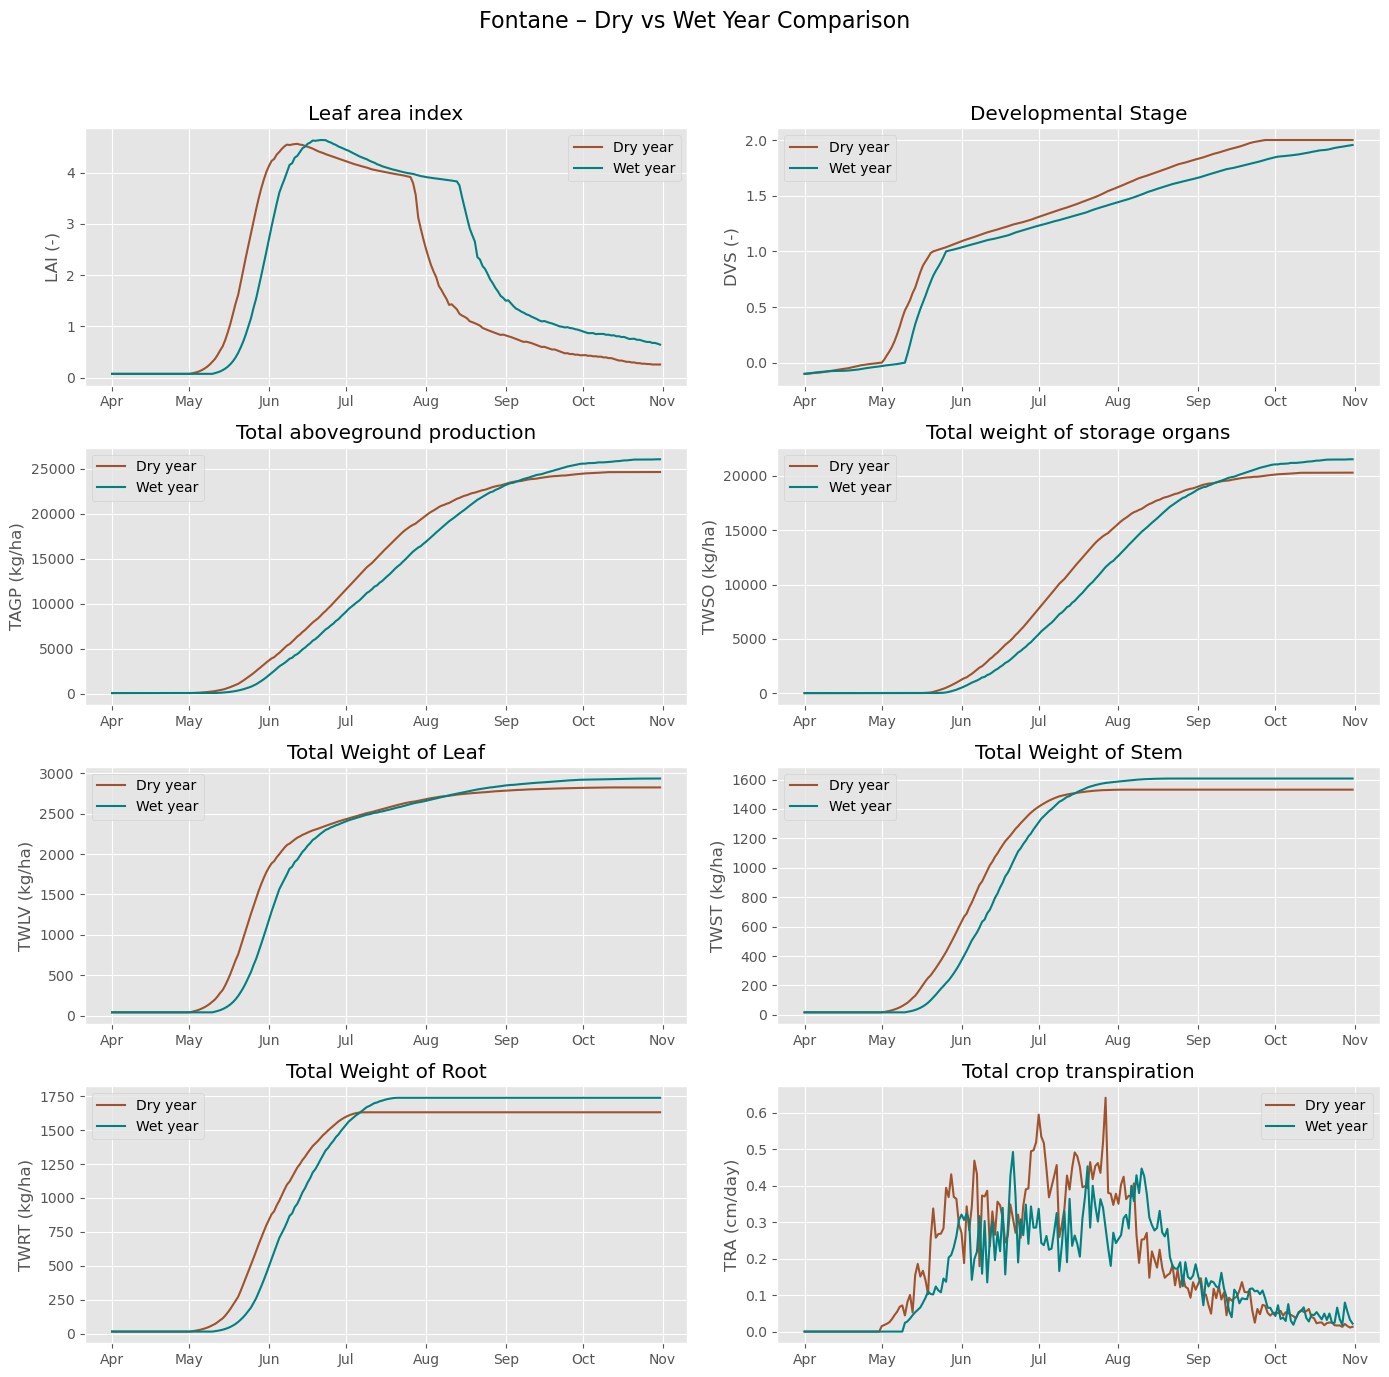

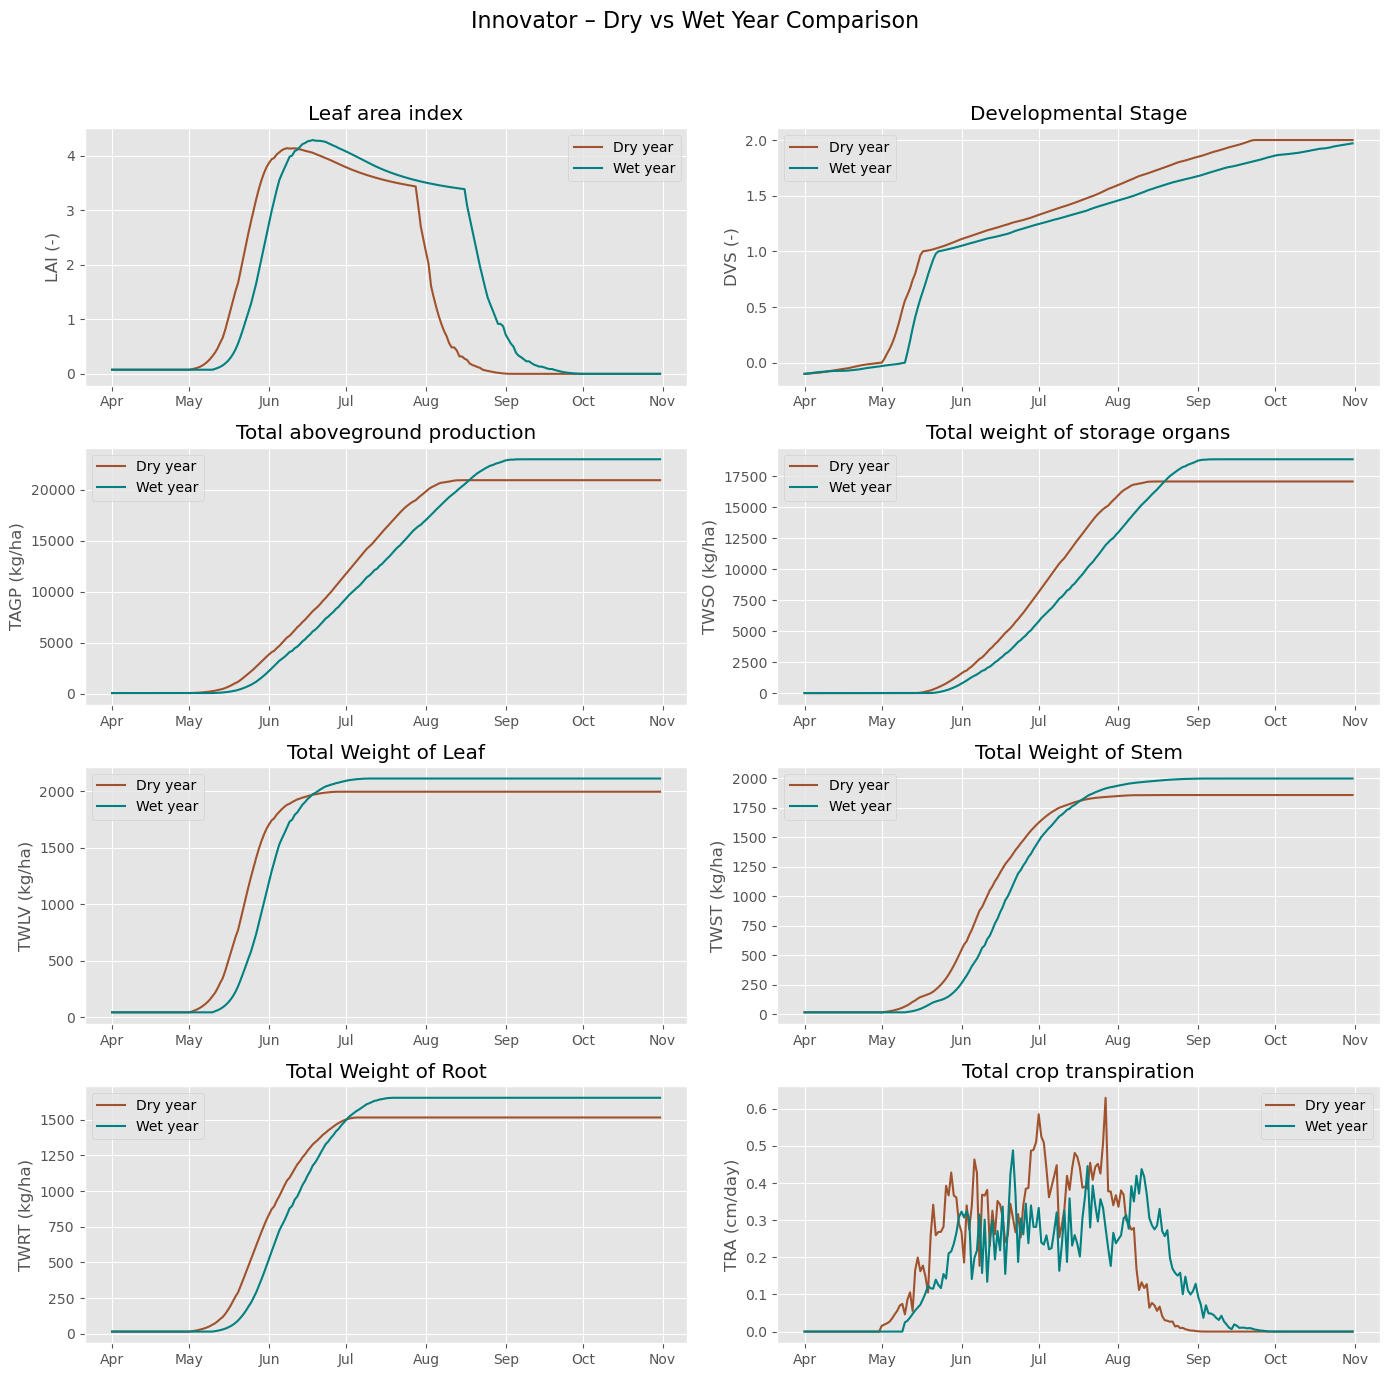

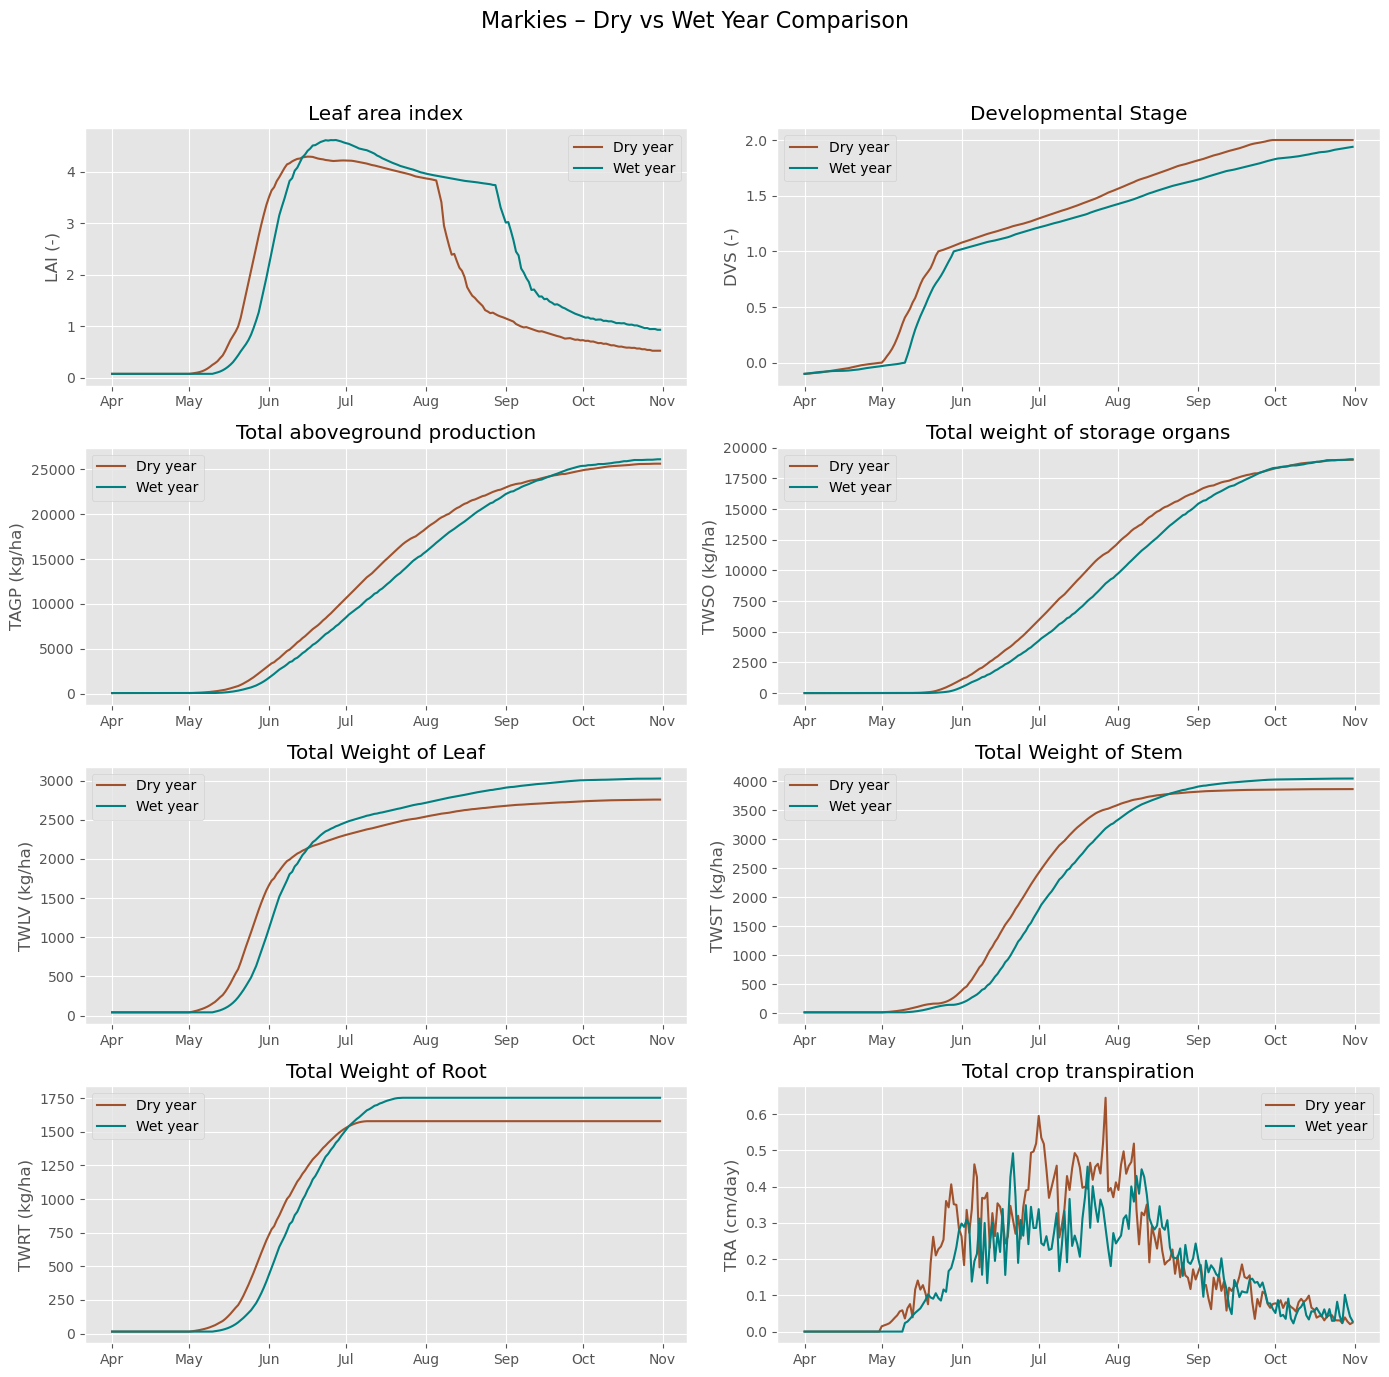

In [131]:
# === 1. Grouping by VARIETY ===
variety_groups = {
    "Fontane": (df_fontane_dry, df_fontane_wet),
    "Innovator": (df_inno_dry, df_inno_wet),
    "Markies": (df_mark_dry, df_mark_wet),
}

for variety, (dry_df, wet_df) in variety_groups.items():
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 14))
    axes = axes.flatten()

    for ax, (var, label, unit) in zip(axes, WOFOST_variables):
        ax.plot(dry_df.index, dry_df[var], label="Dry year", color="sienna")
        ax.plot(wet_df.index, wet_df[var], label="Wet year", color="teal")
        ax.set_title(label)
        ax.set_ylabel(f"{var} ({unit})")
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
        ax.tick_params(axis='x', rotation=0)
        ax.legend()

    fig.suptitle(f"{variety} – Dry vs Wet Year Comparison", fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

### 3.2 Comparison of varieties within each climate year

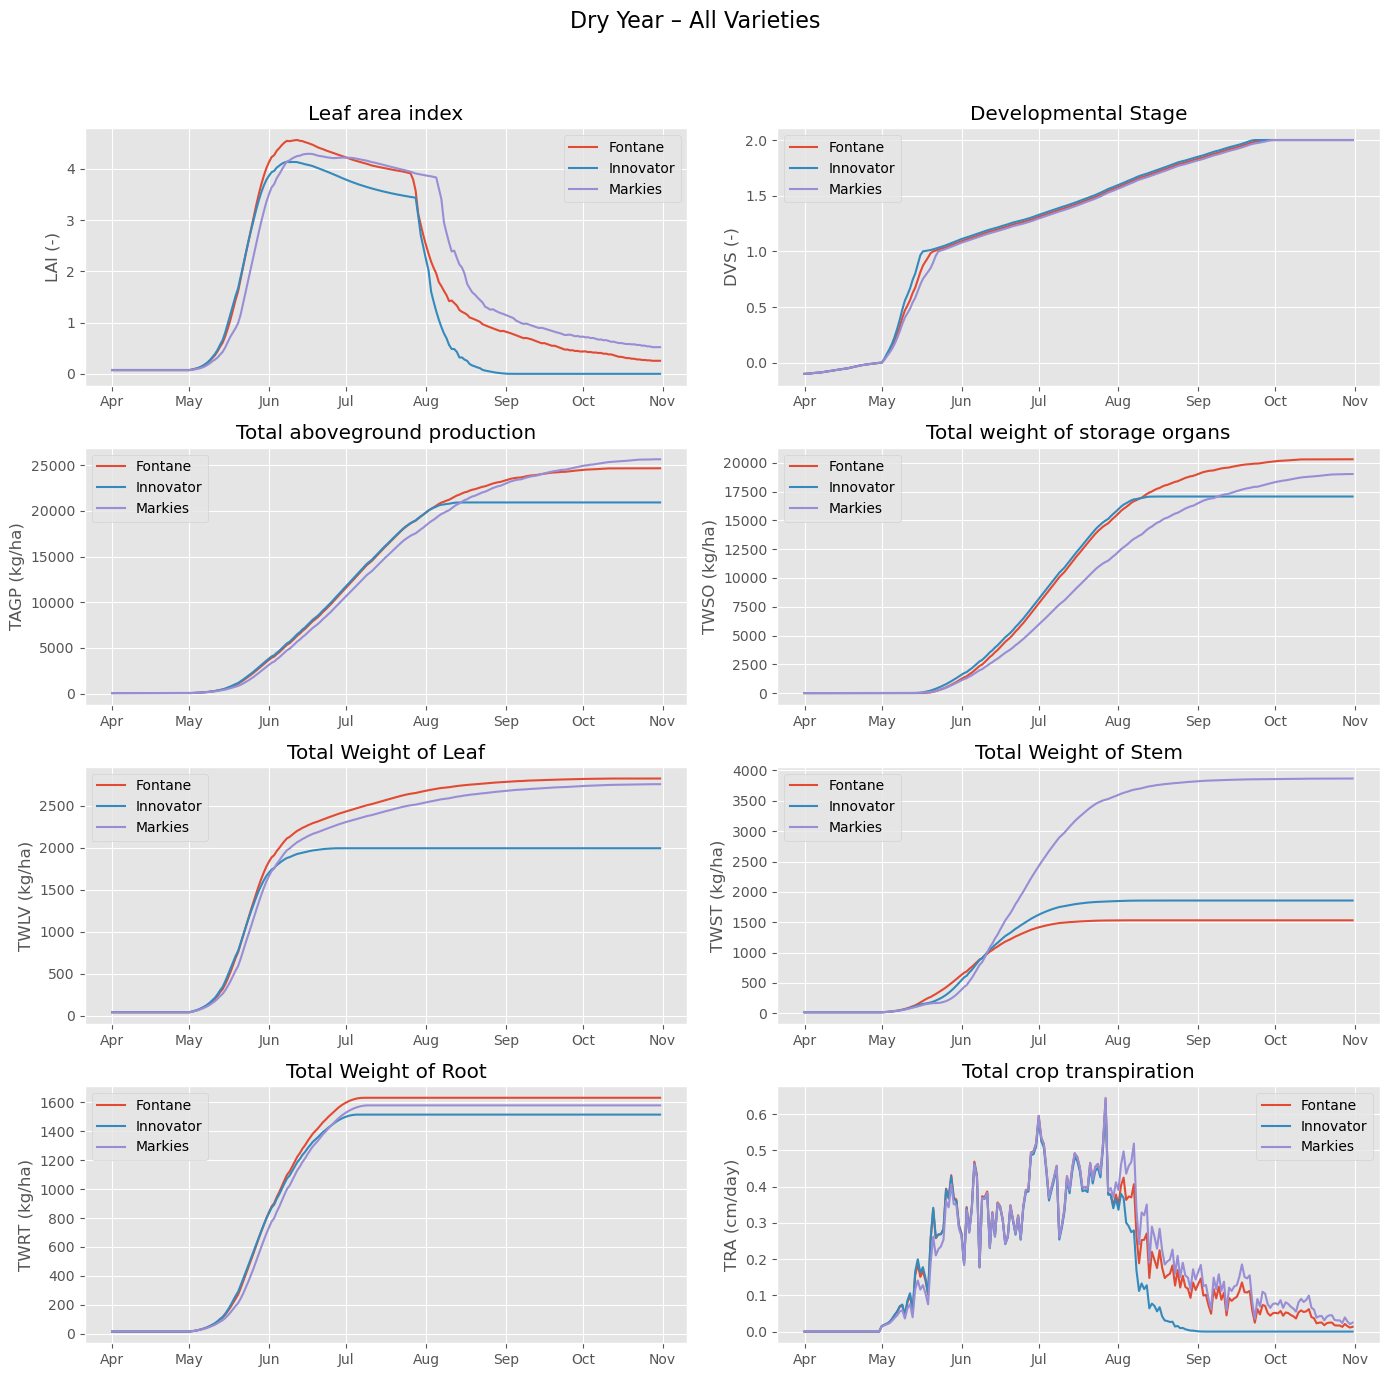

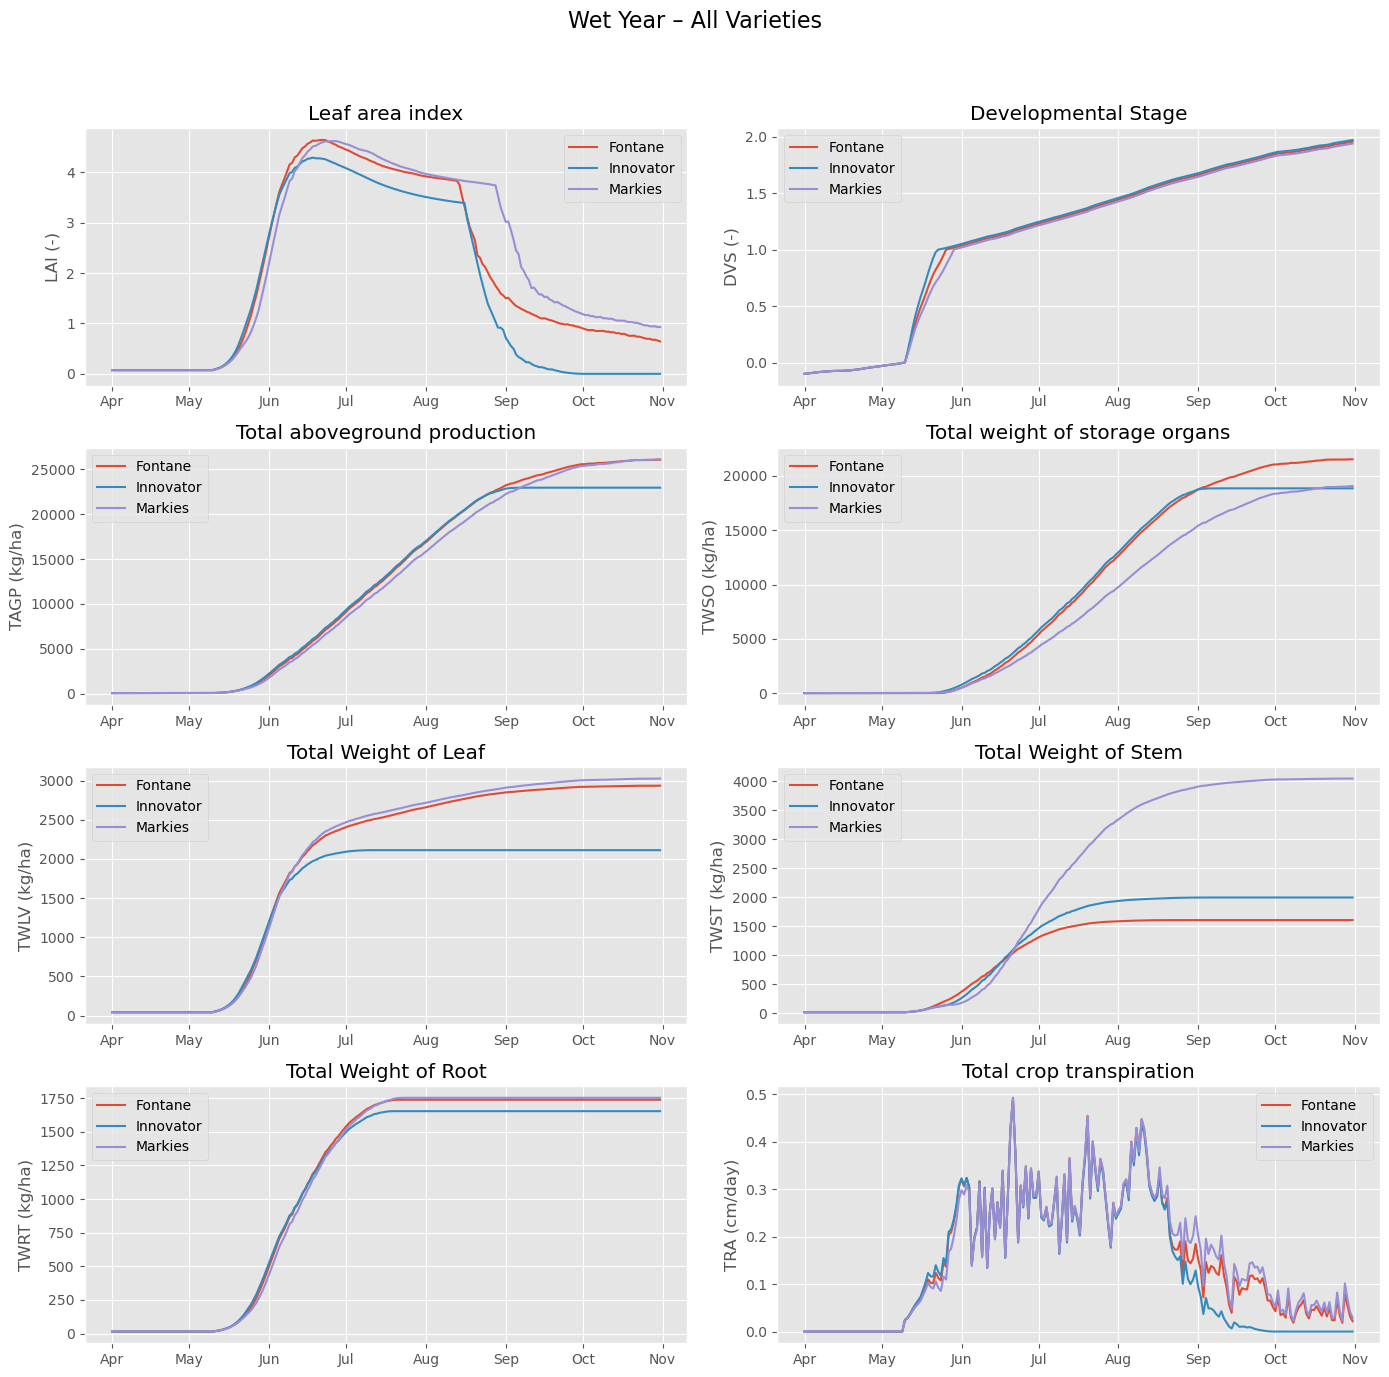

In [130]:
# === 2. Grouping by WET OR DRY CONDITION ===
year_groups = {
    "Dry Year": {
        "Fontane": df_fontane_dry,
        "Innovator": df_inno_dry,
        "Markies": df_mark_dry
    },
    "Wet Year": {
        "Fontane": df_fontane_wet,
        "Innovator": df_inno_wet,
        "Markies": df_mark_wet
    }
}

for condition, group in year_groups.items():
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 14))
    axes = axes.flatten()

    for ax, (var, label, unit) in zip(axes, WOFOST_variables):
        for variety, df in group.items():
            ax.plot(df.index, df[var], label=variety)
        ax.set_title(label)
        ax.set_ylabel(f"{var} ({unit})")
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
        ax.tick_params(axis='x', rotation=0)
        ax.legend()

    fig.suptitle(f"{condition} – All Varieties", fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

## 4. Discussion
*This section is generated by Consensus AI*
### 4.1 Phenotypic responses of potato varieties to dry and wet years
Simulation results show that all three varieties responded differently to dry and wet conditions, particularly in terms of growth dynamics, organ biomass partitioning, and transpiration. In the dry year, leaf area index (LAI) declined earlier for all varieties, indicating quicker senescence. This was most pronounced in Innovator, while Fontane and Markies maintained their canopy slightly longer, suggesting better stress tolerance.

Developmental stages (DVS) progressed faster under drought across all varieties, reflecting stress-induced acceleration of phenology, which limits the time available for biomass accumulation. Fontane and Markies maintained slightly longer developmental durations, which may have contributed to their higher biomass production.

The analysis of total aboveground production (TAGP) and storage organ biomass (TWSO) revealed that Fontane and Markies achieved higher final yields under both dry and wet years compared to Innovator. Notably, Innovator plateaued earlier under drought, consistent with its early maturing nature.

In terms of organ-specific biomass, all varieties showed similar patterns: drought reduced the total weight of leaf, stem, and root, but Fontane maintained higher stem and storage organ weight than the others in both conditions. Markies showed the highest stem biomass under both years, possibly reflecting a more robust structural growth strategy.

Total crop transpiration (TRA) was higher in the dry year for all varieties, peaking during the mid-season. This is likely due to higher vapor pressure deficits and greater evaporative demand in 2018. Fontane and Markies exhibited more consistent transpiration rates than Innovator, which declined sharply post-peak, suggesting that early canopy senescence may have limited water use and assimilation.

These results demonstrate that mid- to late-maturing varieties like Fontane and Markies are better able to sustain vegetative growth, biomass partitioning, and water use efficiency under drought conditions.

## 4.2 Implications for adaptation and breeding under future climate scenarios
The findings from this simulation study suggest important traits for developing potato varieties suitable for future climates. The ability to maintain canopy duration, balanced biomass partitioning, and moderate transpiration under drought was associated with better yield stability, particularly in Fontane and Markies.

Breeding programs should prioritize potato plant traits that delay canopy senescence, yield stability under stress, and moderate transpiration rate that balance water use and yield potential.

Innovator’s early maturity and sharp drop in transpiration and leaf area under drought suggest it is less adapted to prolonged dry periods, reinforcing the need for enhancing stress resilience in early maturing cultivars.

Simulation modeling proved useful for identifying performance differences and stress responses, helping to inform the selection of varieties like Fontane that combine yield stability, efficient partitioning, and adaptability under climate variability.


## 5. Conclusion
*This section is generated by Consensus AI*

This study showed that potato varieties differ in their phenotypic responses to dry and wet years, influenced by maturity class and biomass partitioning traits. Fontane and Markies performed more consistently under drought, maintaining higher leaf area and tuber yield compared to Innovator. These results highlight the importance of selecting traits like delayed senescence and stable biomass allocation for breeding climate-resilient varieties. Fontane stands out as a promising candidate for future drought-prone environments.